<a href="https://colab.research.google.com/github/pparkpparkyi/DataMinning/blob/main/DataMinning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn statsmodels scikit-learn
!pip install pandas matplotlib seaborn statsmodels scikit-learn


Date    0
pH      0
dtype: int64
Date               0
Jellyfish Count    0
dtype: int64
Date                    0
Sea Temperature (°C)    0
dtype: int64
Date                                      0
Biochemical Oxygen Demand (BOD) (mg/L)    0
Chemical Oxygen Demand (COD) (mg/L)       0
Total Nitrogen (TN) (mg/L)                0
Total Phosphorus (TP) (mg/L)              0
dtype: int64
Date              0
Salinity (PSU)    0
dtype: int64
Date                     0
Nitrate (NO) (mg/L)      0
Phosphate (PO) (mg/L)    0
Silicate (SiO(mg/L)      0
dtype: int64
Date                   0
Current Speed (m/s)    0
dtype: int64


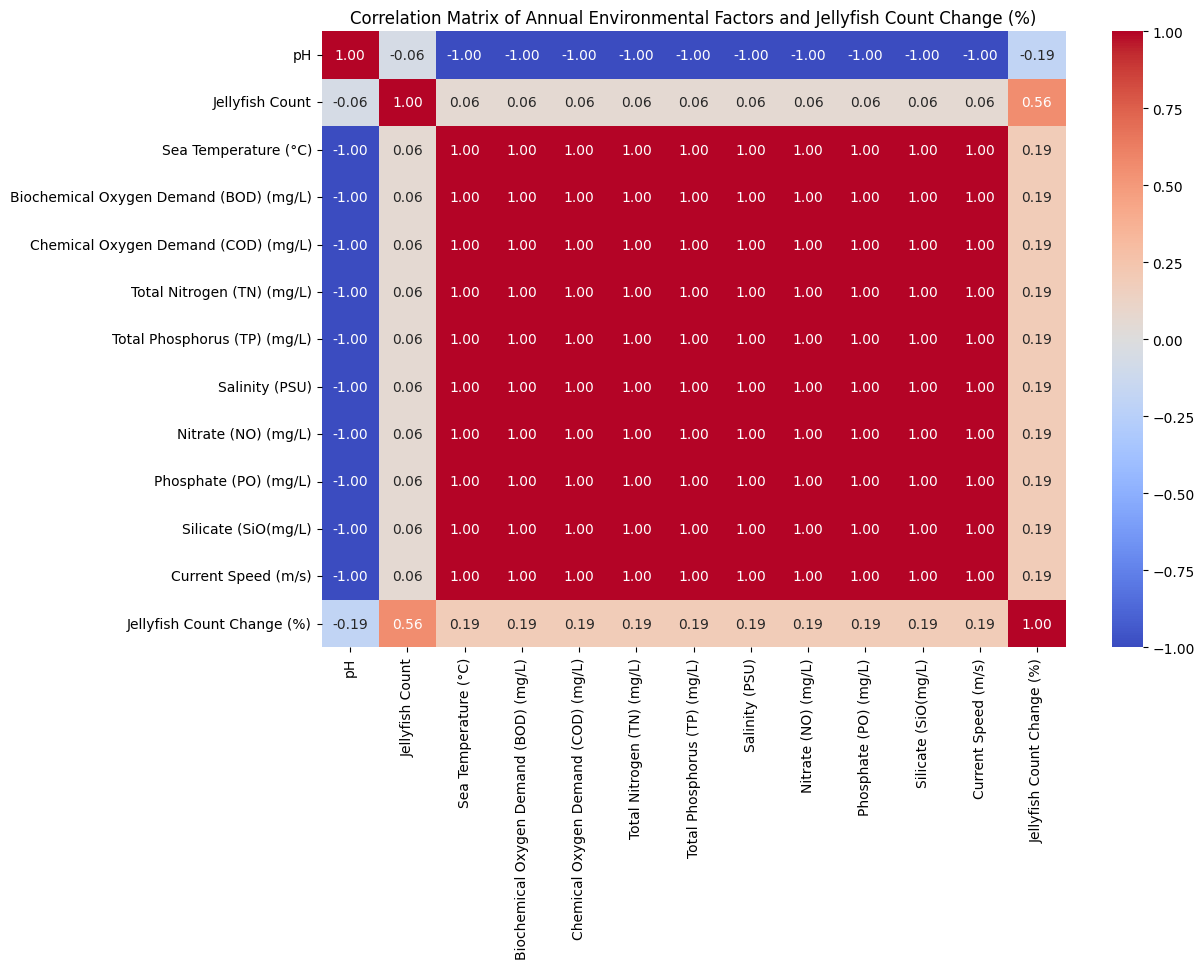

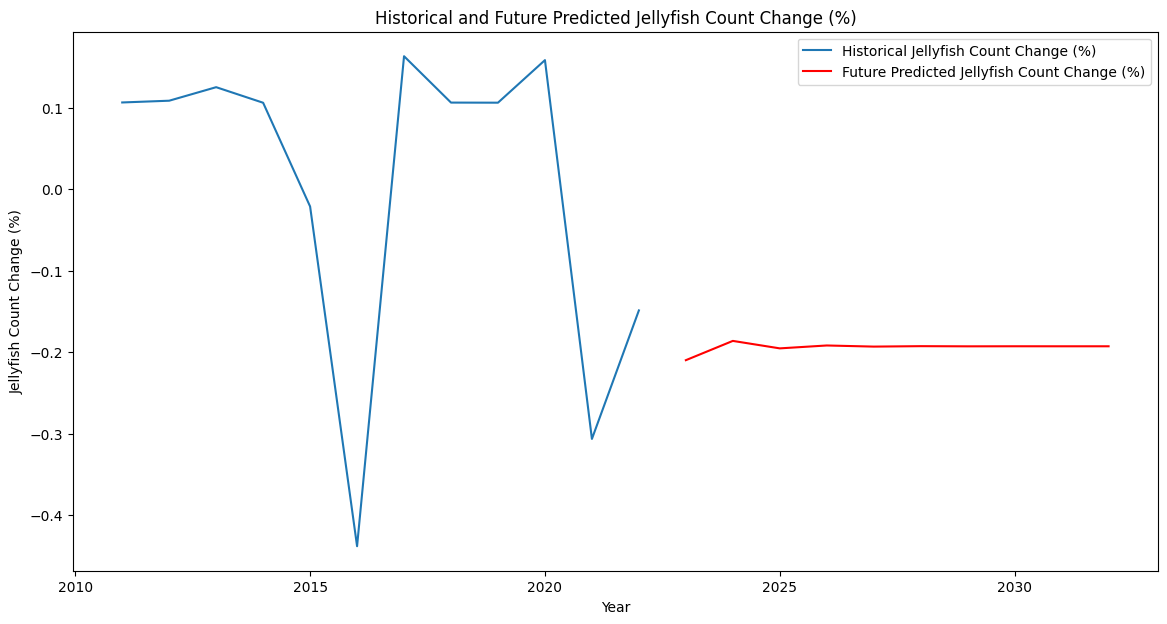

In [ ]:
# 필요한 라이브러리 설치
!pip install pandas matplotlib seaborn statsmodels scikit-learn

# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터셋 로드
ocean_acidification = pd.read_csv('/content/(2010-2022)해양산성화.csv')
jellyfish_count = pd.read_csv('/content/(2010-2022)해파리수.csv')
sea_temperature = pd.read_csv('/content/(2010-2022)수온.csv')
water_pollution = pd.read_csv('/content/(2010-2022)수질오염.csv')
salinity = pd.read_csv('/content/(2010-2022)염분.csv')
nutrients = pd.read_csv('/content/(2010-2022)영양염류.csv')
current_speed = pd.read_csv('/content/(2010-2022)유속.csv')

# 날짜 형식 변환 및 결측치 확인
for df in [ocean_acidification, jellyfish_count, sea_temperature, water_pollution, salinity, nutrients, current_speed]:
    df['Date'] = pd.to_datetime(df['Date'])
    print(df.isnull().sum())

# 데이터셋 병합
merged_df = ocean_acidification.merge(jellyfish_count, on='Date')\
                               .merge(sea_temperature, on='Date')\
                               .merge(water_pollution, on='Date')\
                               .merge(salinity, on='Date')\
                               .merge(nutrients, on='Date')\
                               .merge(current_speed, on='Date')

# 연간 평균 값 계산
annual_data = merged_df.resample('Y', on='Date').mean()

# 연간 해파리 수 변화율 계산
annual_data['Jellyfish Count Change (%)'] = annual_data['Jellyfish Count'].pct_change() * 100
annual_data = annual_data.dropna()

# 상관관계 행렬 계산 및 시각화
correlation_matrix_annual = annual_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_annual, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Annual Environmental Factors and Jellyfish Count Change (%)')
plt.show()

# 연간 해파리 수 변화율을 예측하기 위한 ARIMA 모델 학습
change_series = annual_data[['Jellyfish Count Change (%)']]
change_model = ARIMA(change_series, order=(1, 1, 0))
change_model_fit = change_model.fit()

# 향후 10년간 해파리 수 변화율 예측
forecast_years = 10
future_change_predictions = change_model_fit.forecast(steps=forecast_years)
last_year = change_series.index[-1].year
future_years = pd.date_range(start=pd.Timestamp(f'{last_year + 1}-01-01'), periods=forecast_years, freq='Y')

# 예측 결과 시각화
future_change_df = pd.DataFrame({'Year': future_years.year, 'Predicted Jellyfish Count Change (%)': future_change_predictions.values})
plt.figure(figsize=(14, 7))
plt.plot(change_series.index.year, change_series['Jellyfish Count Change (%)'], label='Historical Jellyfish Count Change (%)')
plt.plot(future_change_df['Year'], future_change_df['Predicted Jellyfish Count Change (%)'], label='Future Predicted Jellyfish Count Change (%)', color='red')
plt.legend()
plt.title('Historical and Future Predicted Jellyfish Count Change (%)')
plt.xlabel('Year')
plt.ylabel('Jellyfish Count Change (%)')
plt.show()
